# Task 1: Data Preparation (30 Points)

### Task 1A: Exploratory Data Analysis (10 Points)

Start with exploring the raw data that is available:

* Notice all sorts of properties of the dataset: how many records are there, how manyattributes, what kinds of 
attributes are there, ranges of values, distribution of values, relationships between attributes, missing values, and
 so on.  A table is often a suitableway of showing such properties of a dataset. Notice if something is interesting (to you,or in general), make sure you write it down if you find something worth mentioning.
* Make various plots of the data. Is there something interesting worth reporting? Report the figures, discuss what is
 in them.  What meaning do those bars, lines, dots, etc. convey? Please select essential and interesting plots for 
 discussion, as you have limitedspace for reporting your findings

In [138]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

plt.style.use('ggplot')
pd.options.display.max_rows = 200

,Unnamed: 0,id,time,variable,value
0,1,AS14.01,2014-02-26 13:00:00.000,mood,6.0
1,2,AS14.01,2014-02-26 15:00:00.000,mood,6.0
2,3,AS14.01,2014-02-26 18:00:00.000,mood,6.0
3,4,AS14.01,2014-02-26 21:00:00.000,mood,7.0
4,5,AS14.01,2014-02-27 09:00:00.000,mood,6.0


['observation', 'id', 'time', 'variable', 'value']


observation      int64
id              object
time            object
variable        object
value          float64
dtype: object

(376912, 5)

In [145]:
for i in range(1, 10):
    df['id'] = df['id'].replace('AS14.0' + str(i), str(i))
for i in range(10, 34):
    df['id'] = df['id'].replace('AS14.' + str(i), str(i))

Here we checked for the mimimun values and found out that there are some negative values in the dataset. We will remove them.

Here we checked for the durations and found out that there are some negative values in the dataset. We will remove them.

variable
activity                0.000
appCat.builtin          0.001
appCat.communication    0.006
appCat.entertainment    0.001
appCat.finance          0.131
appCat.game             1.003
appCat.office           0.003
appCat.other            0.014
appCat.social           0.094
appCat.travel           0.080
appCat.unknown          0.111
appCat.utilities        0.246
appCat.weather          1.003
call                    1.000
circumplex.arousal     -2.000
circumplex.valence     -2.000
mood                    1.000
screen                  0.035
sms                     1.000
Name: value, dtype: float64


variable
activity                    1.000
appCat.builtin          33960.246
appCat.communication     9830.777
appCat.entertainment    32148.677
appCat.finance            355.513
appCat.game              5491.793
appCat.office           32708.818
appCat.other             3892.038
appCat.social           30000.906
appCat.travel           10452.615
appCat.unknown           2239.937
appCat.utilities         1802.649
appCat.weather            344.863
call                        1.000
circumplex.arousal          2.000
circumplex.valence          2.000
mood                       10.000
screen                   9867.007
sms                         1.000
Name: value, dtype: float64


observation             int64
id                      int64
time                   object
variable               object
value                 float64
datetime       datetime64[ns]
dtype: object

,observation,id,time,variable,value,datetime
0,1,1,2014-02-26 13:00:00.000,mood,6.0,2014-02-26 13:00:00
1,2,1,2014-02-26 15:00:00.000,mood,6.0,2014-02-26 15:00:00
2,3,1,2014-02-26 18:00:00.000,mood,6.0,2014-02-26 18:00:00
3,4,1,2014-02-26 21:00:00.000,mood,7.0,2014-02-26 21:00:00
4,5,1,2014-02-27 09:00:00.000,mood,6.0,2014-02-27 09:00:00


<Axes: title={'center': 'Distribution of value'}, ylabel='Frequency'>

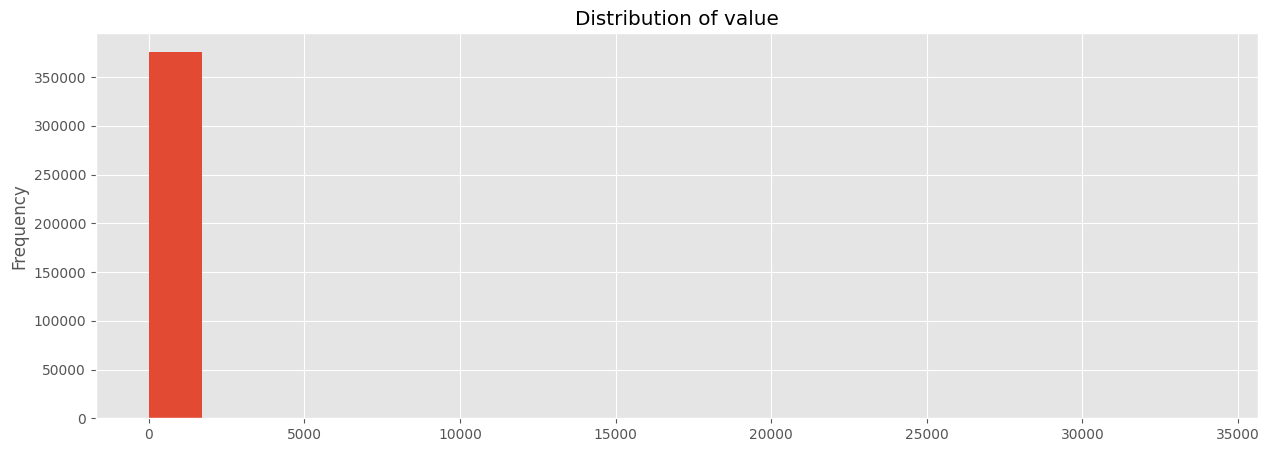

Here we create a wide format of the data to make it easier to work with.

In [156]:
new_order = ['observation', 'id', 'datetime', 'mood', 'circumplex.arousal', 'circumplex.valence', 'activity', 'screen',
             'call', 'sms', 'appCat.builtin', 'appCat.communication', 'appCat.entertainment', 'appCat.finance',
             'appCat.game', 'appCat.office', 'appCat.other', 'appCat.social', 'appCat.travel', 'appCat.unknown',
             'appCat.utilities', 'appCat.weather']

df = (df[new_order]).copy()

Here we add a column for the day of the week.

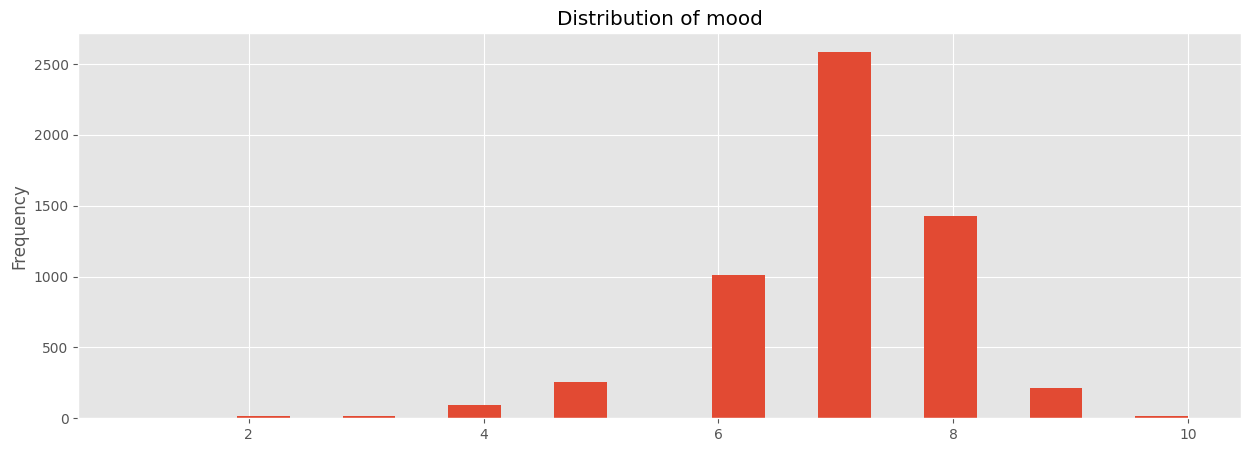

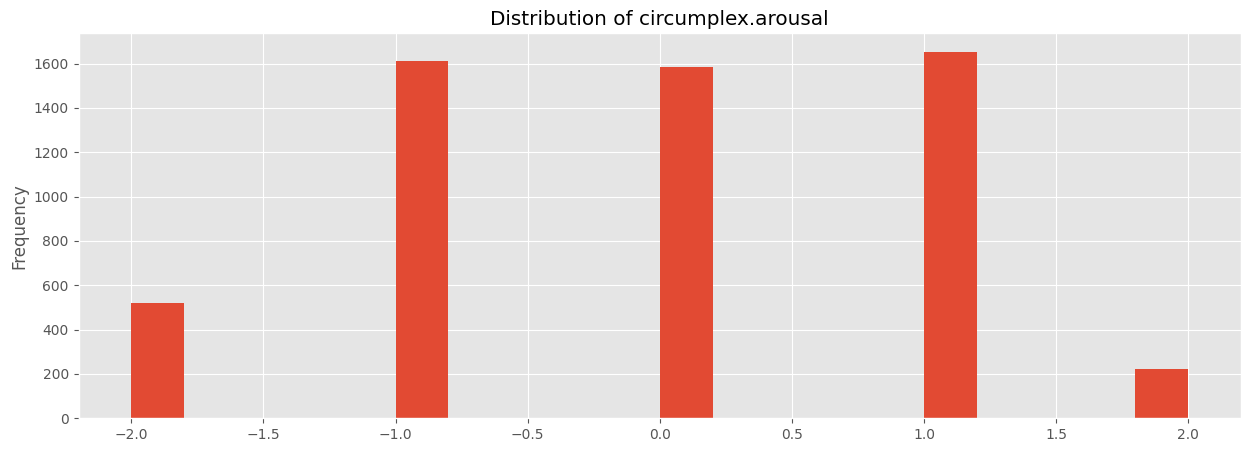

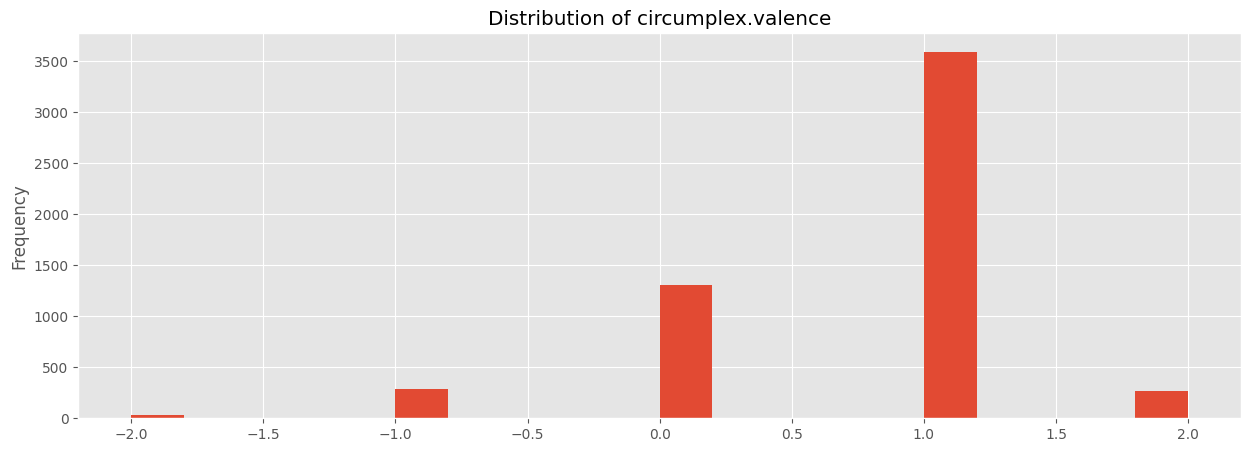

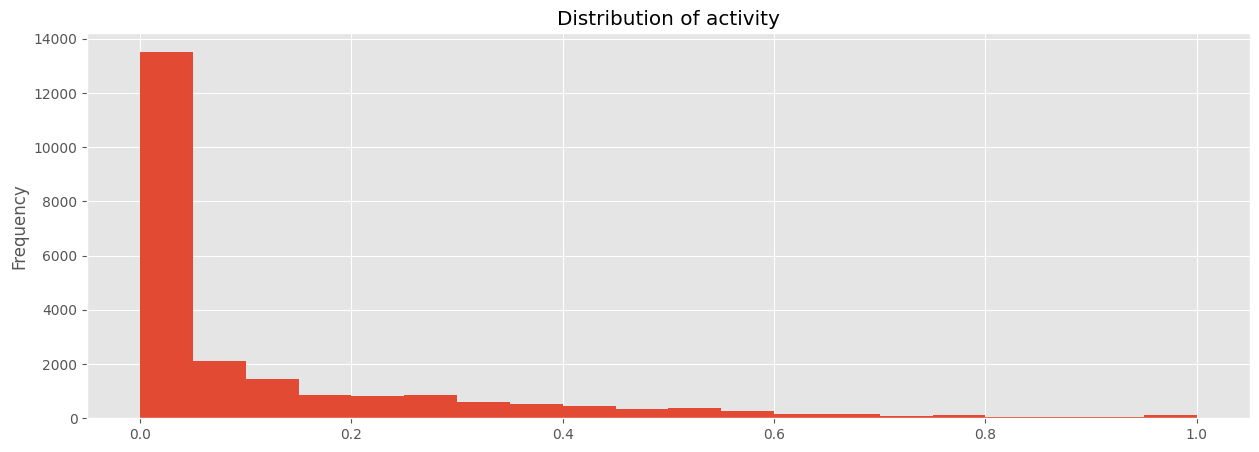

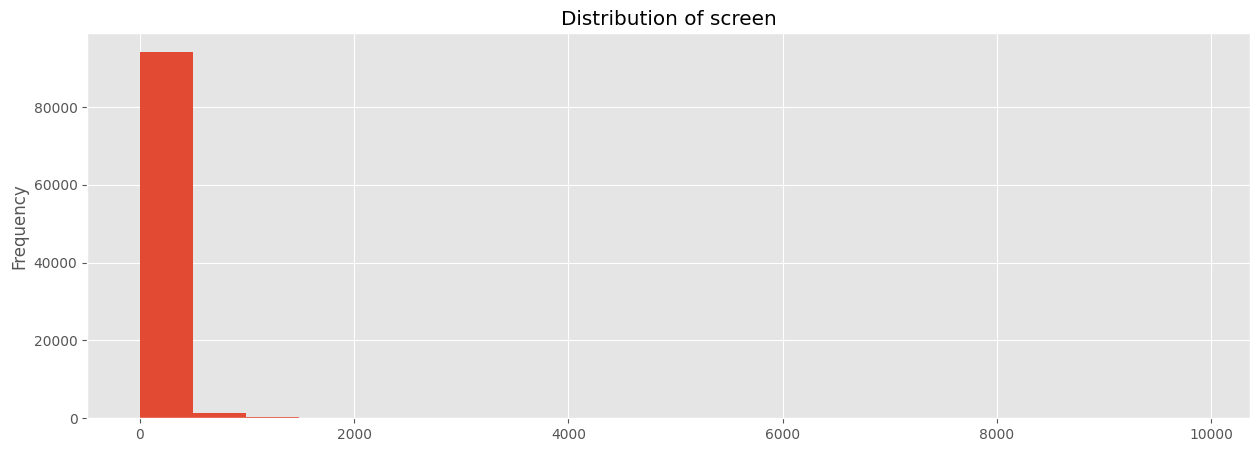

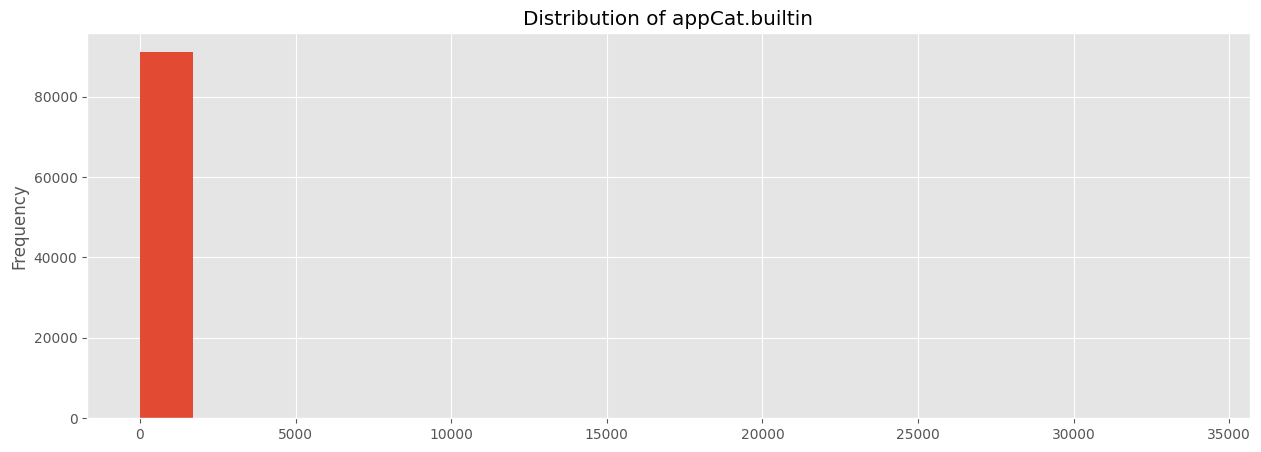

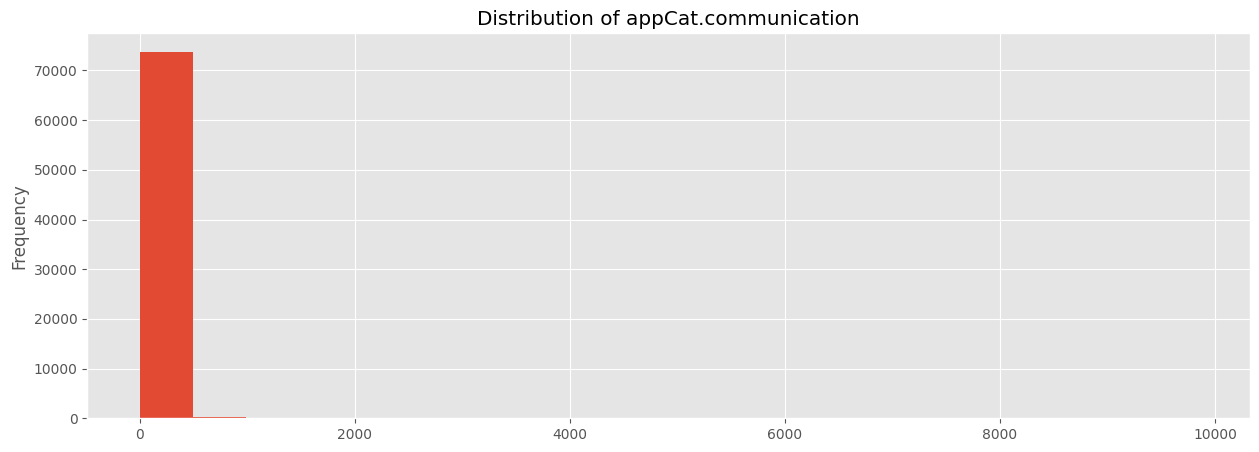

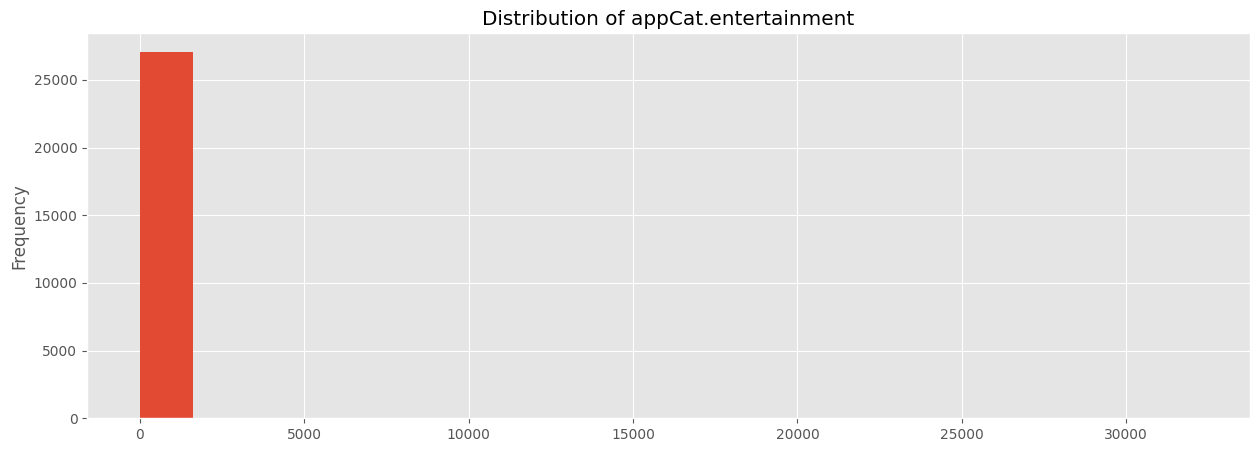

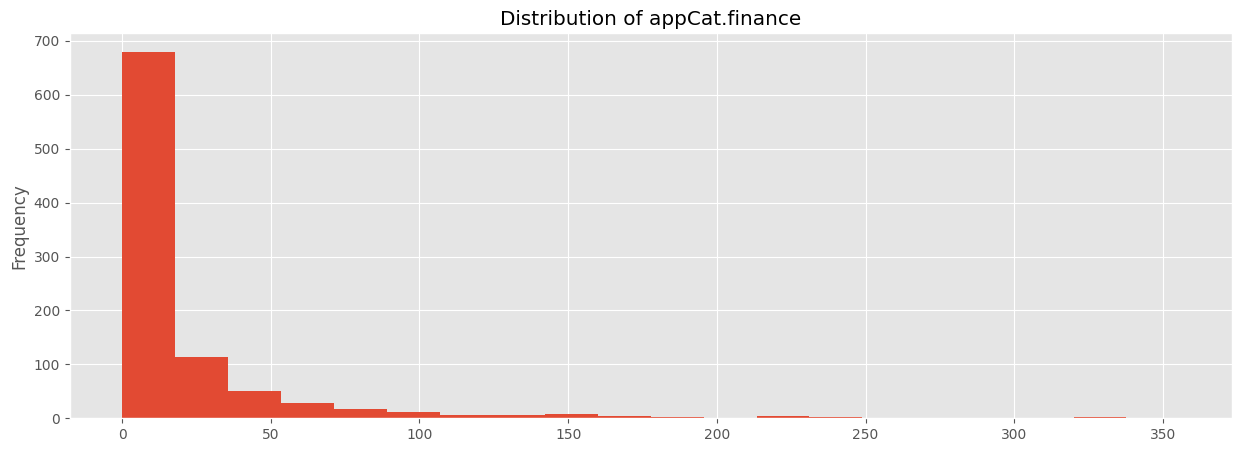

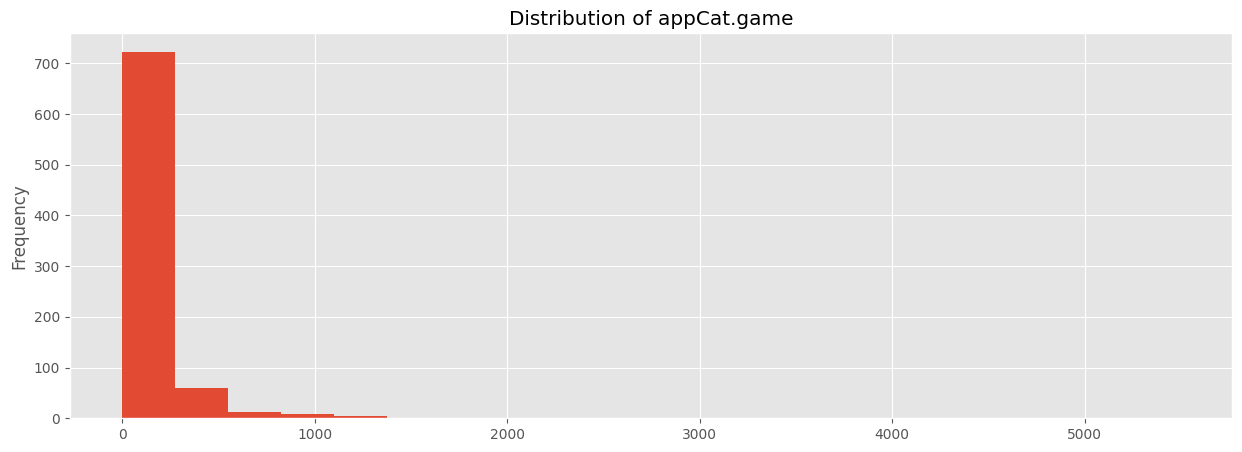

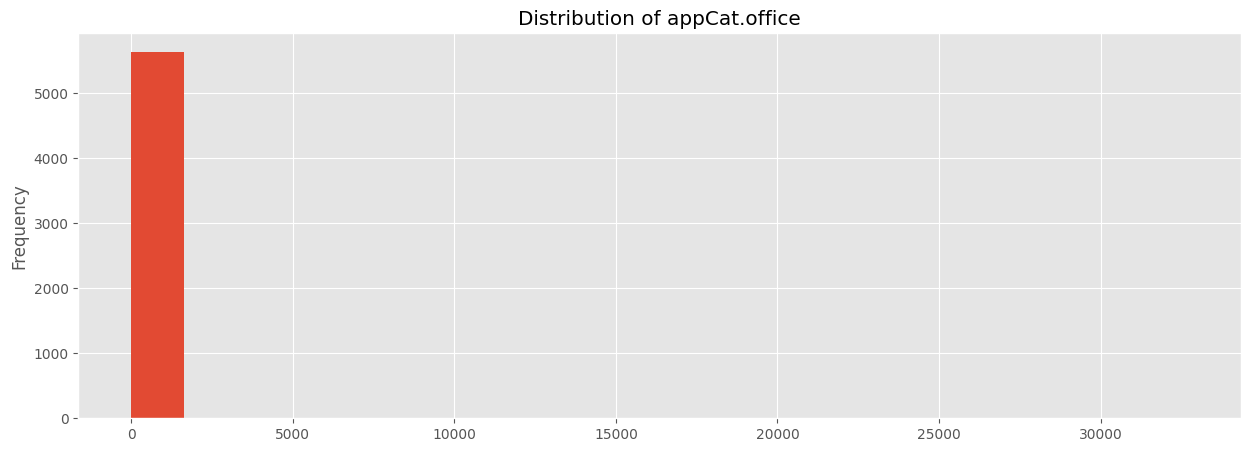

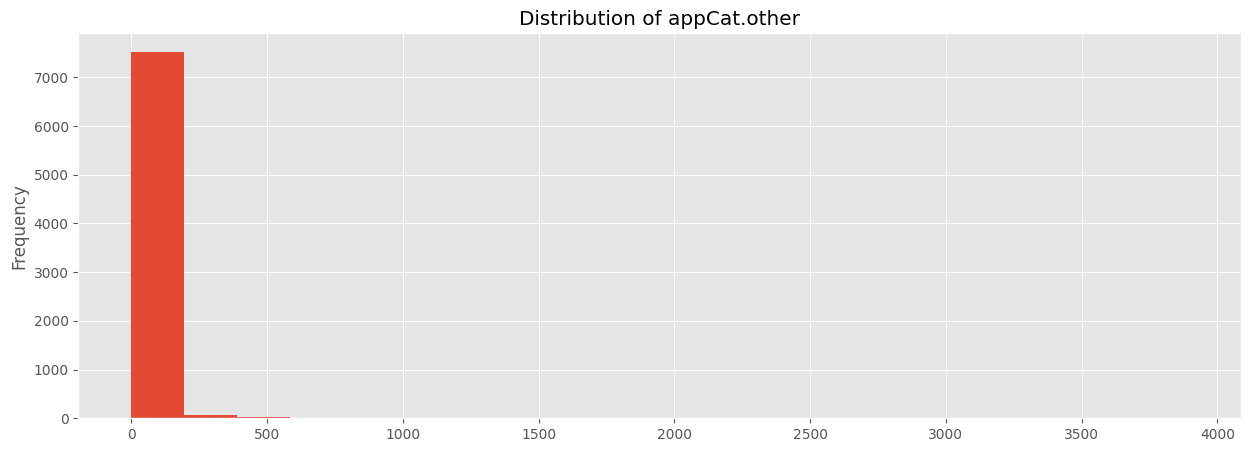

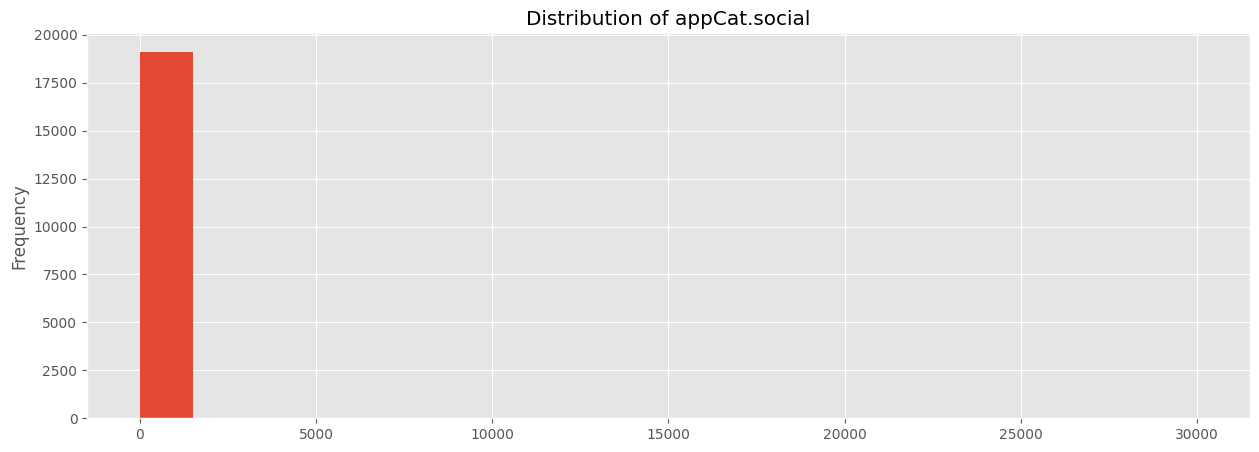

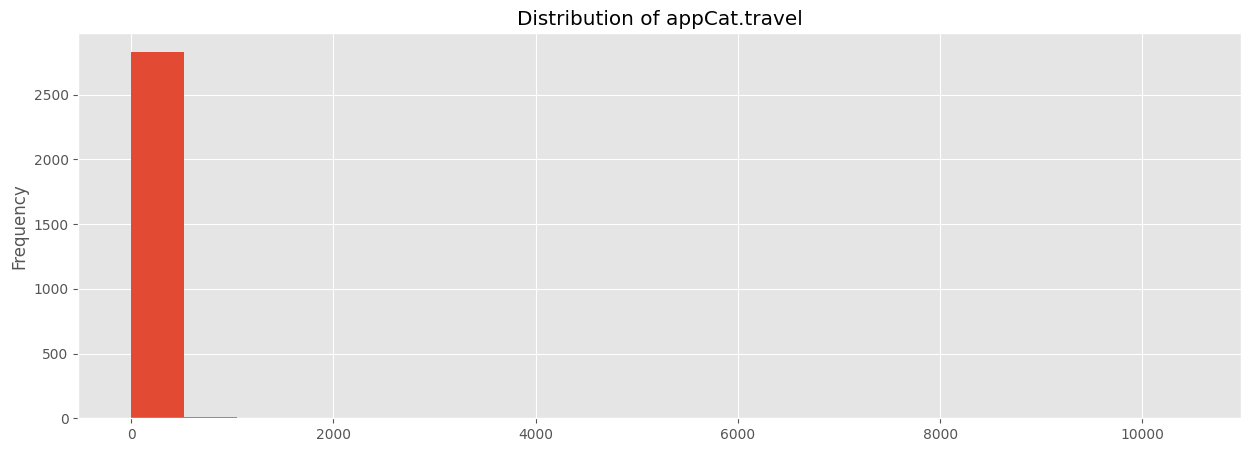

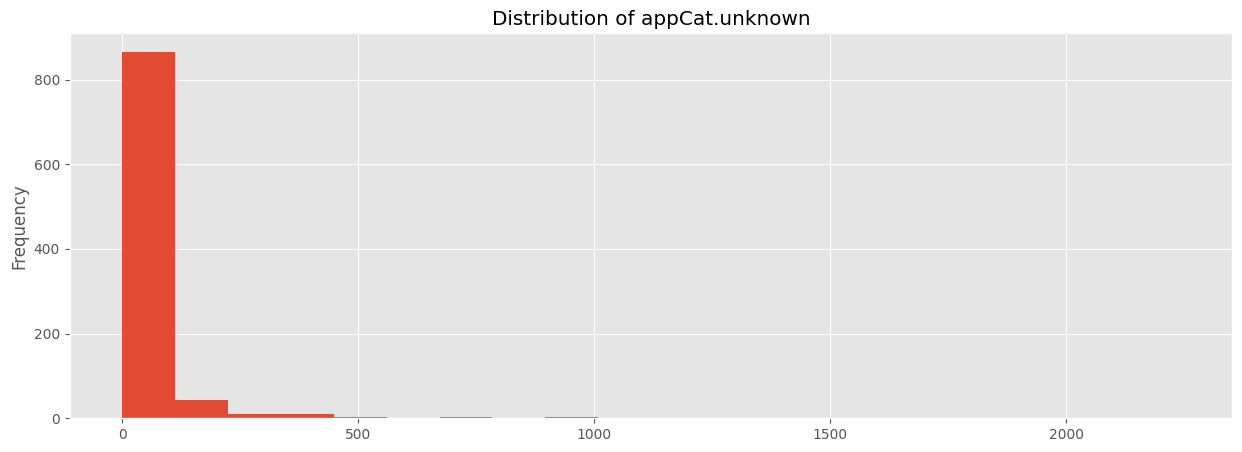

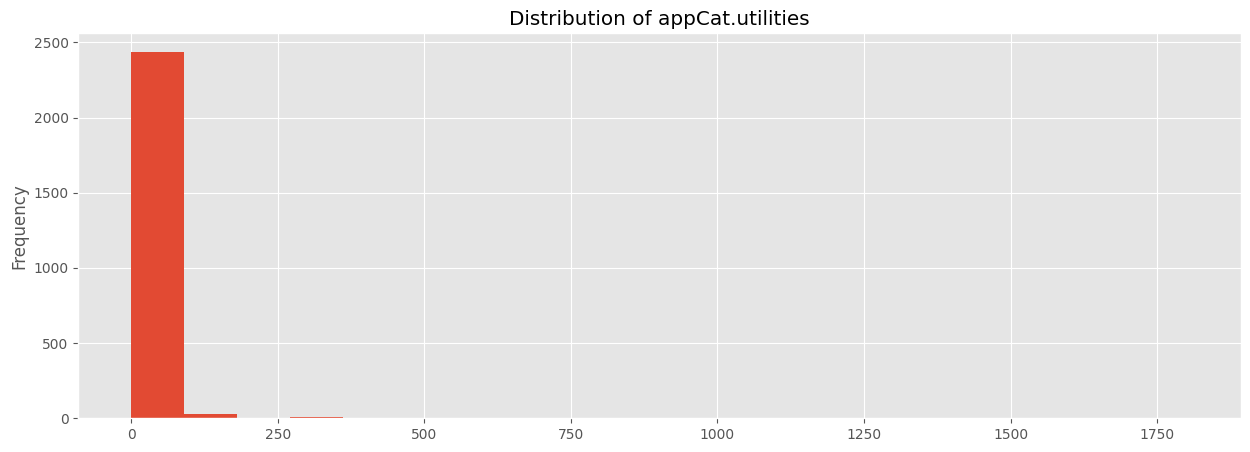

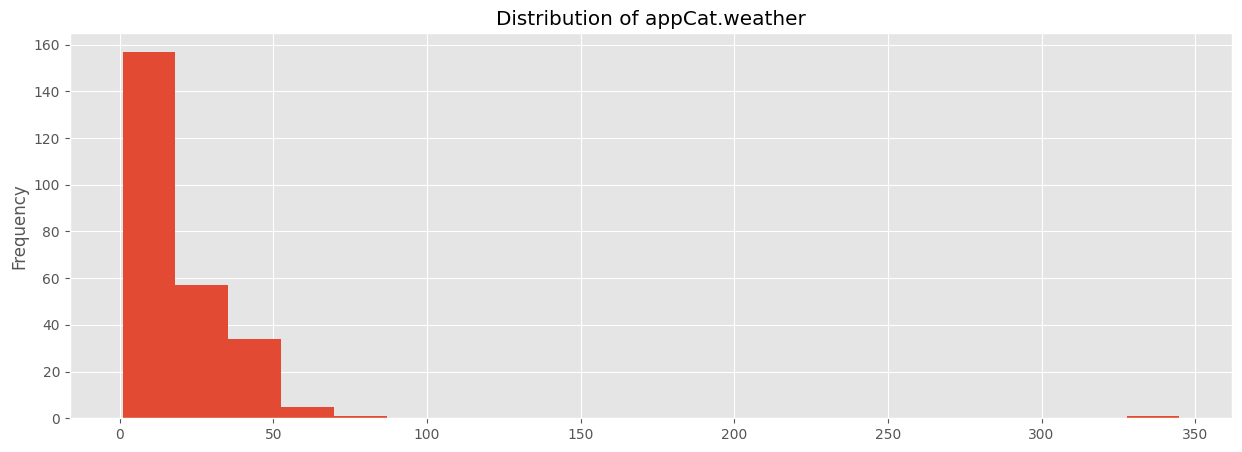

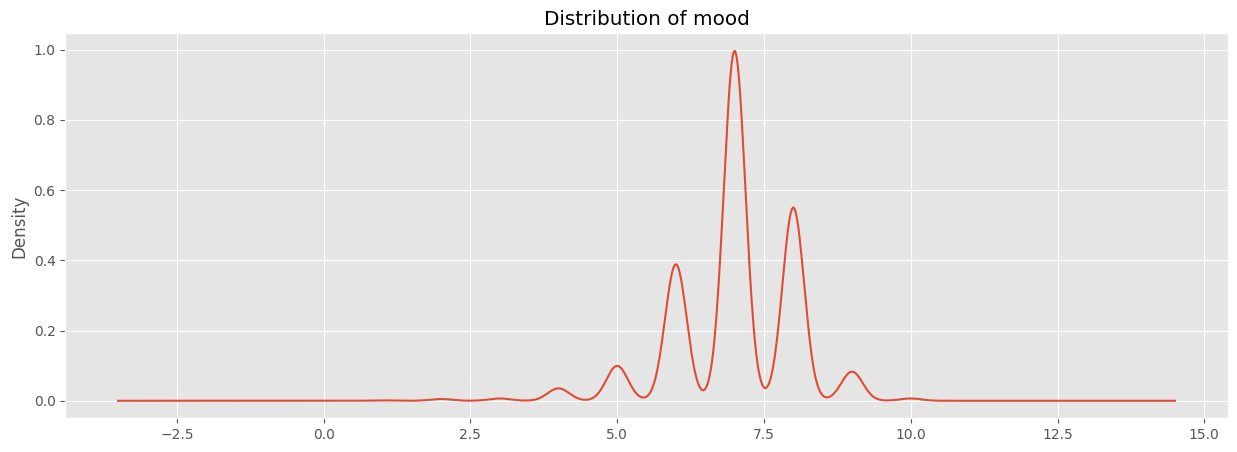

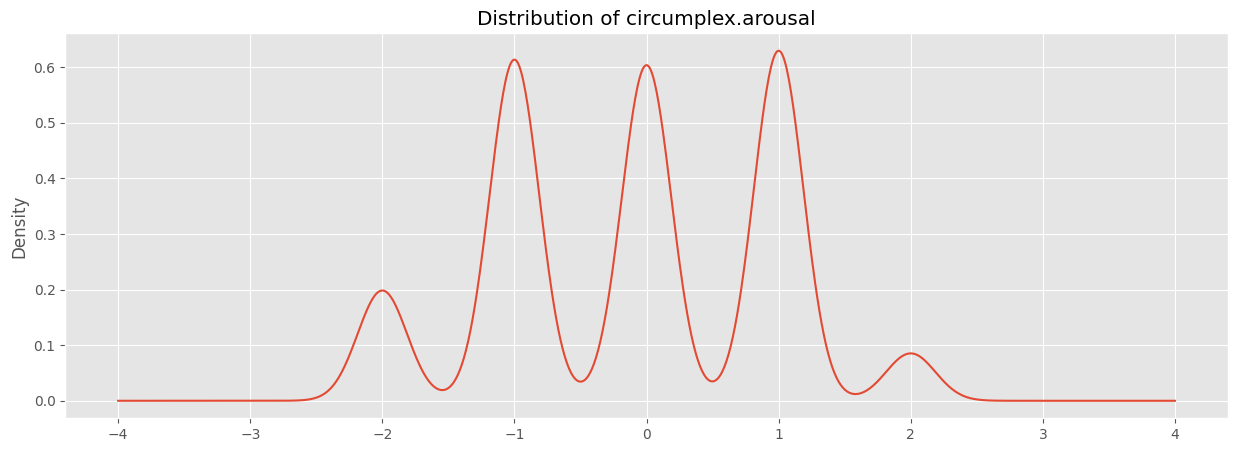

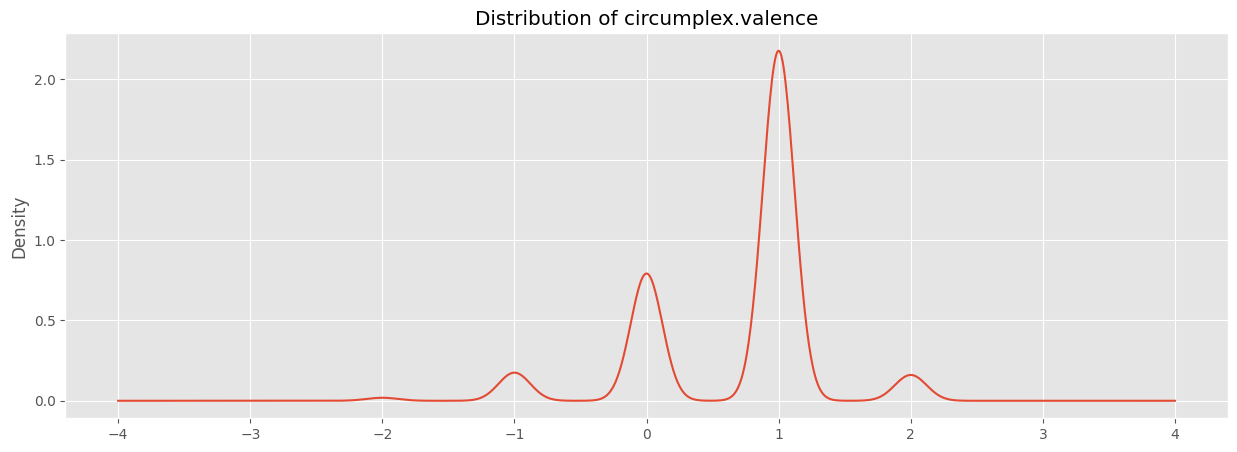

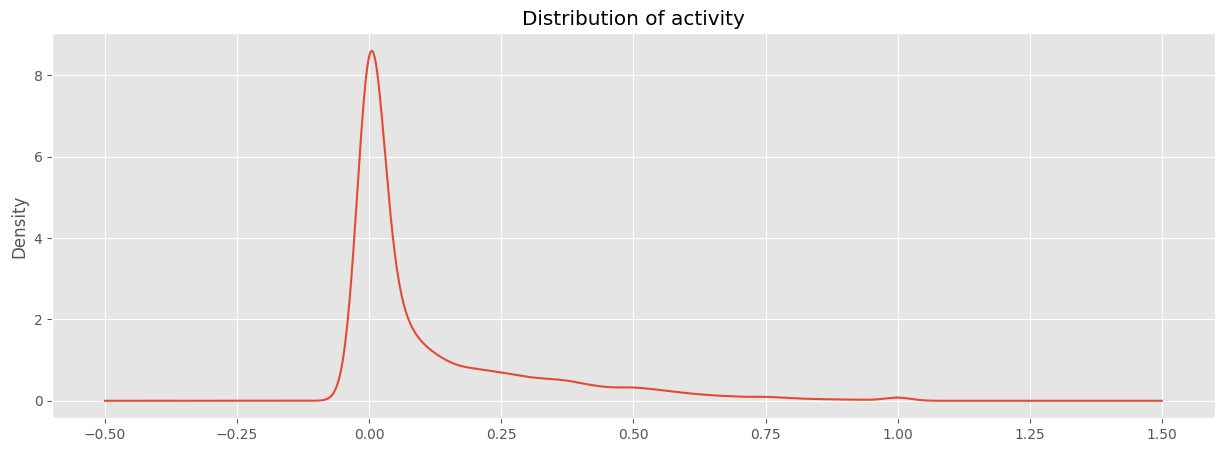

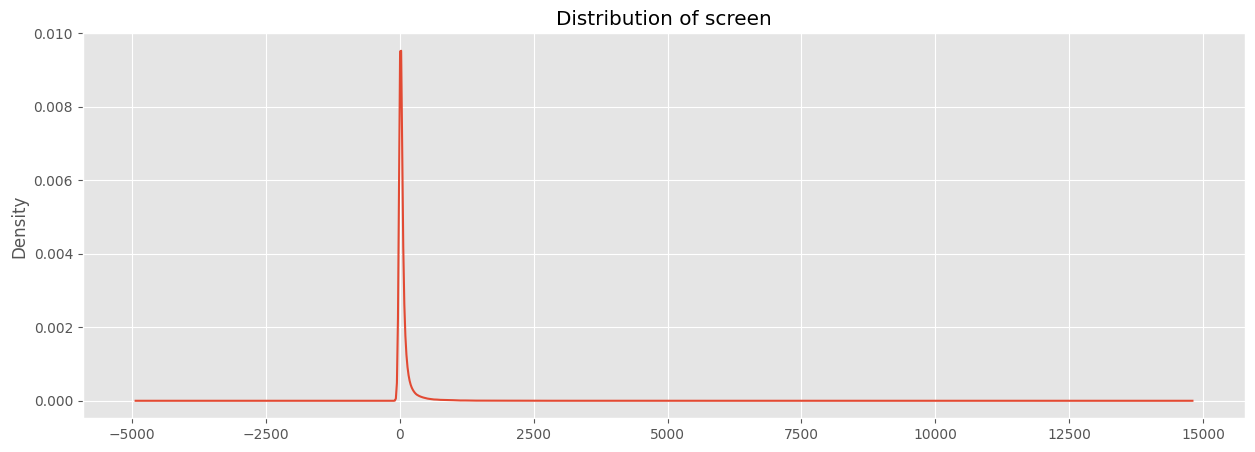

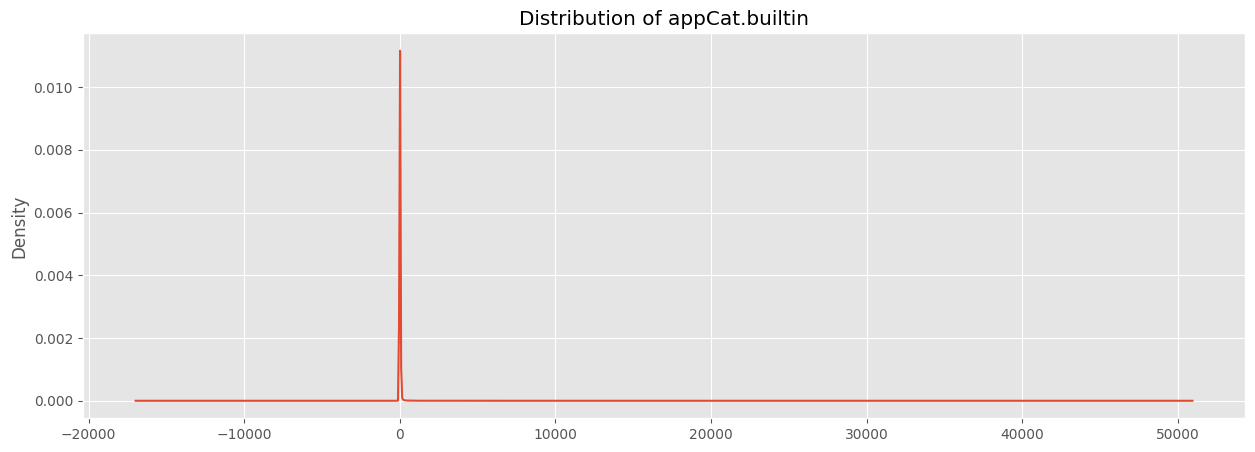

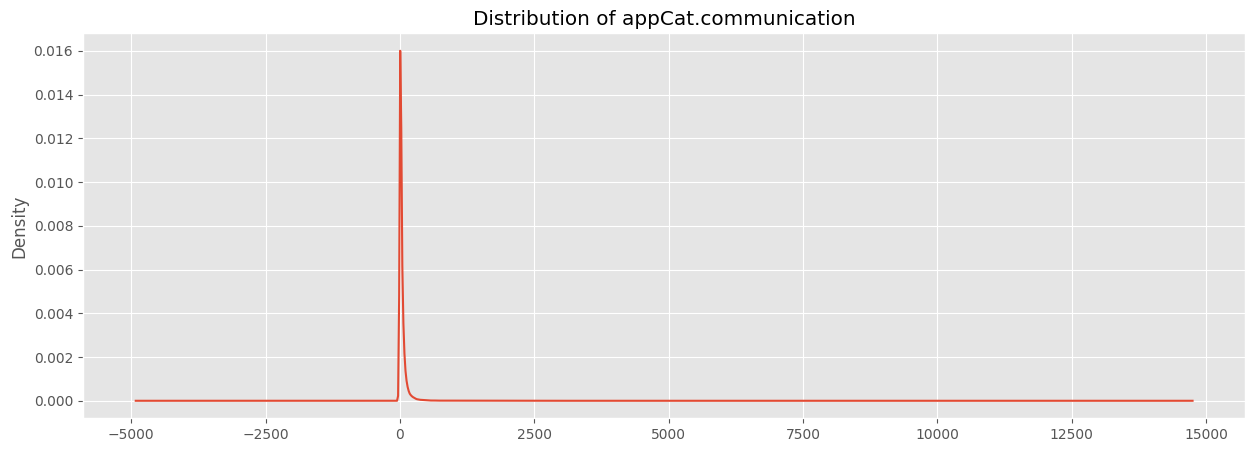

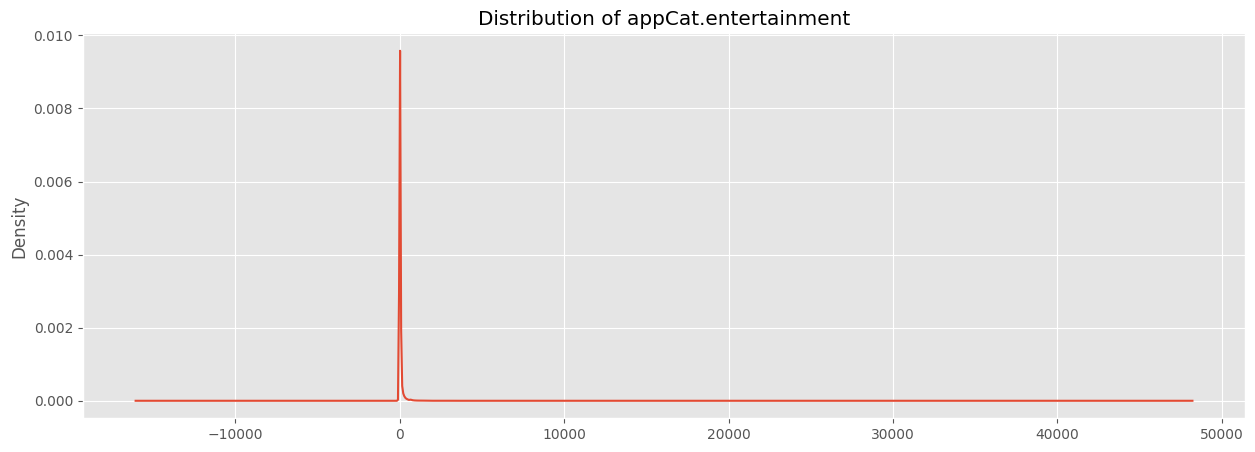

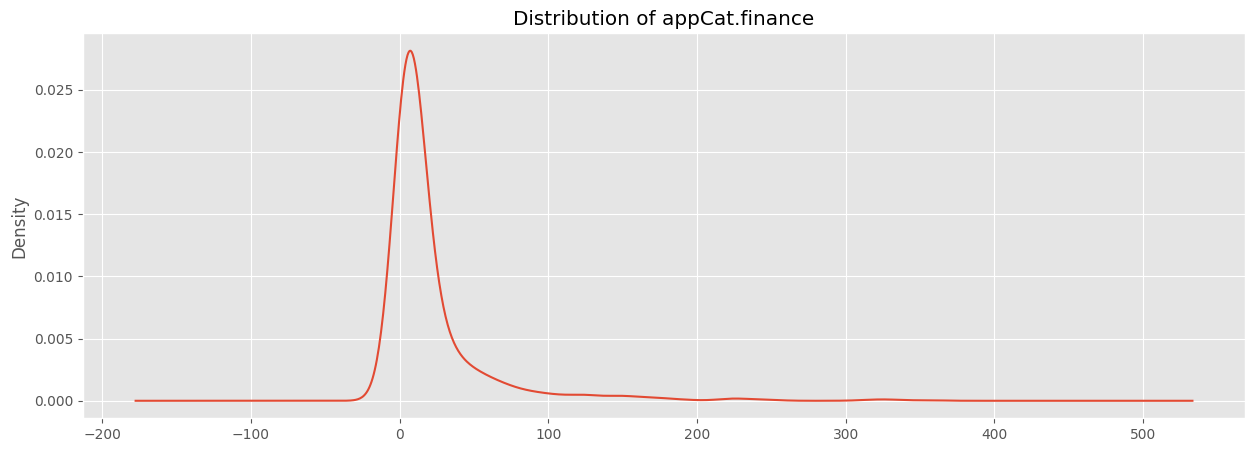

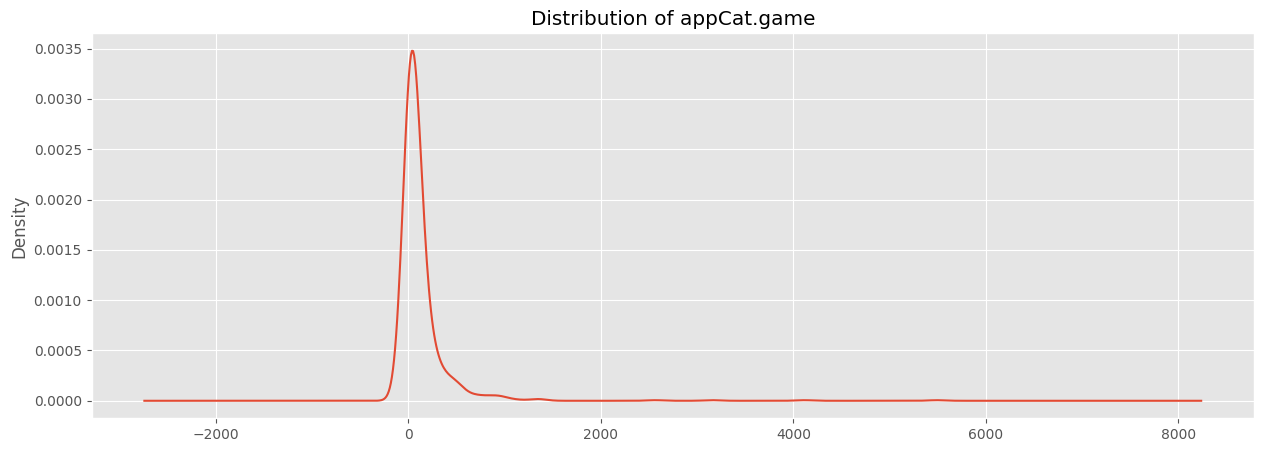

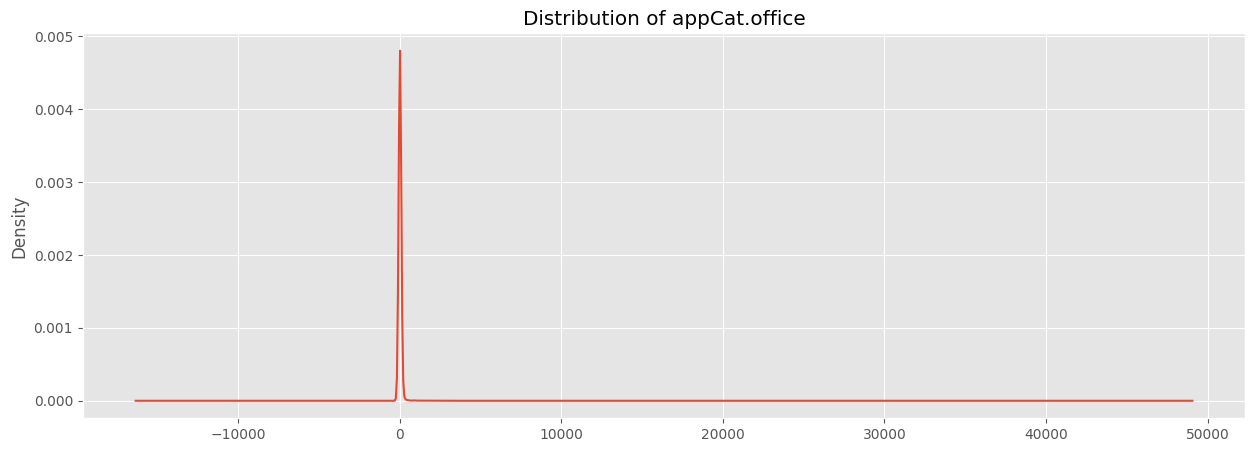

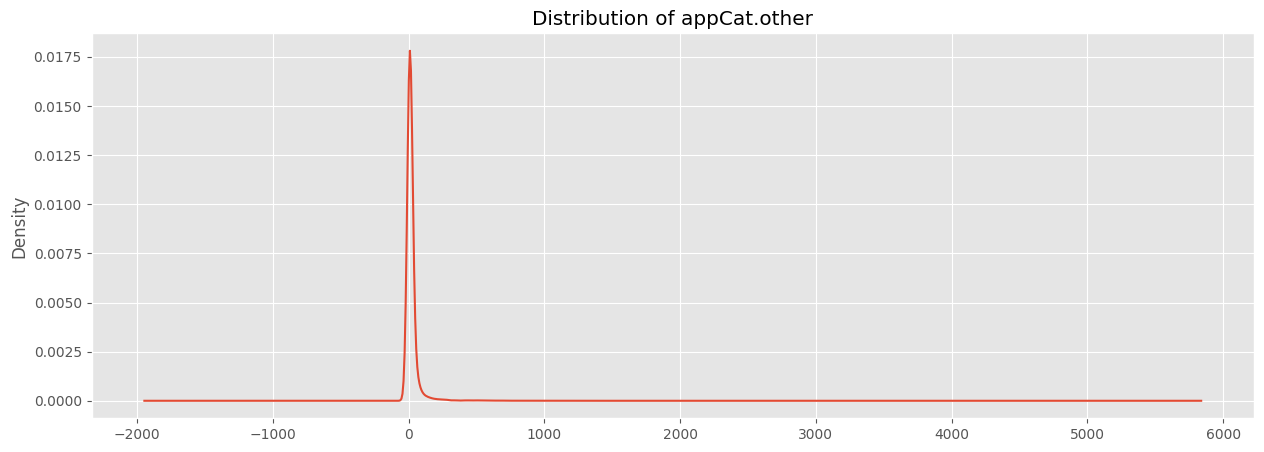

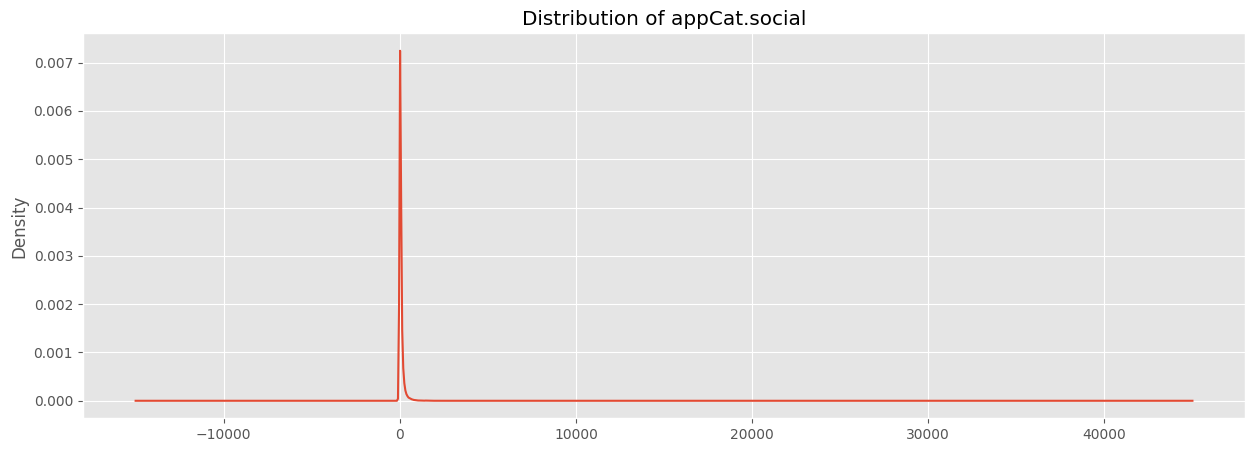

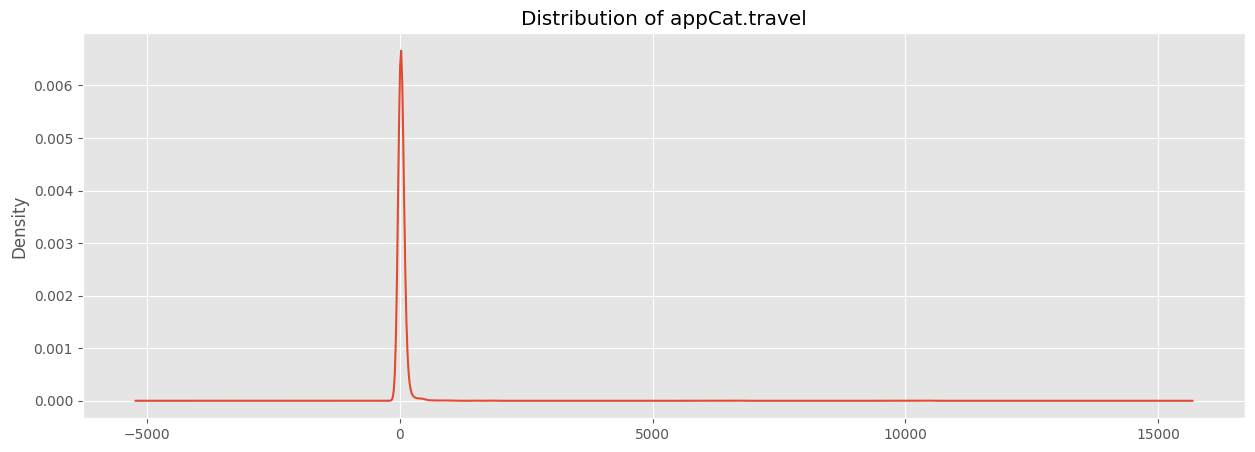

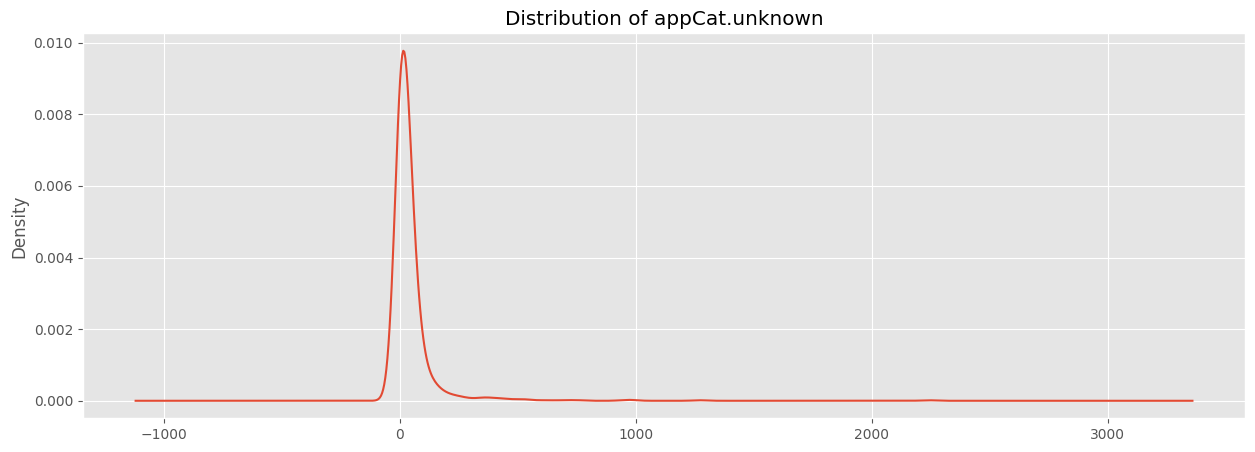

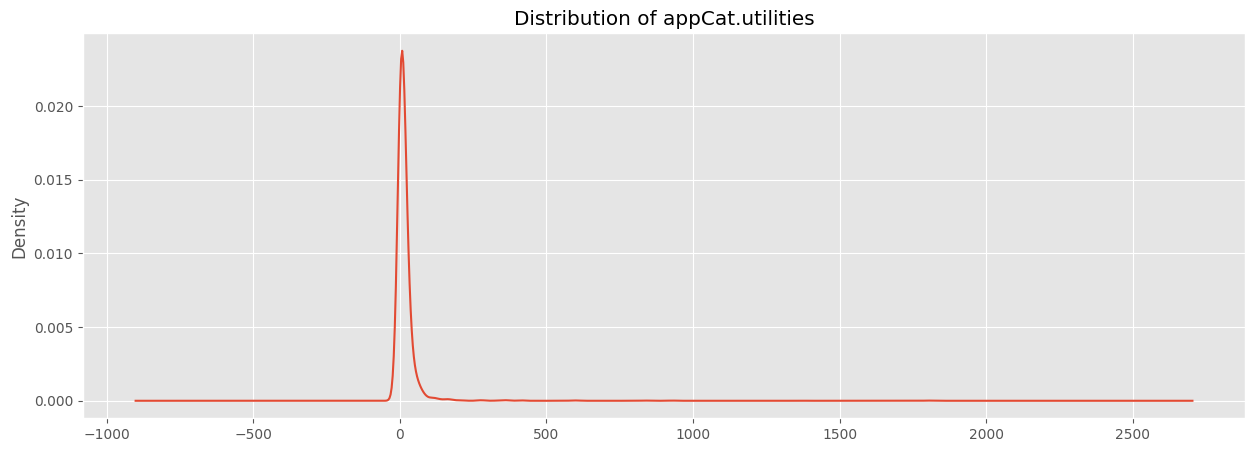

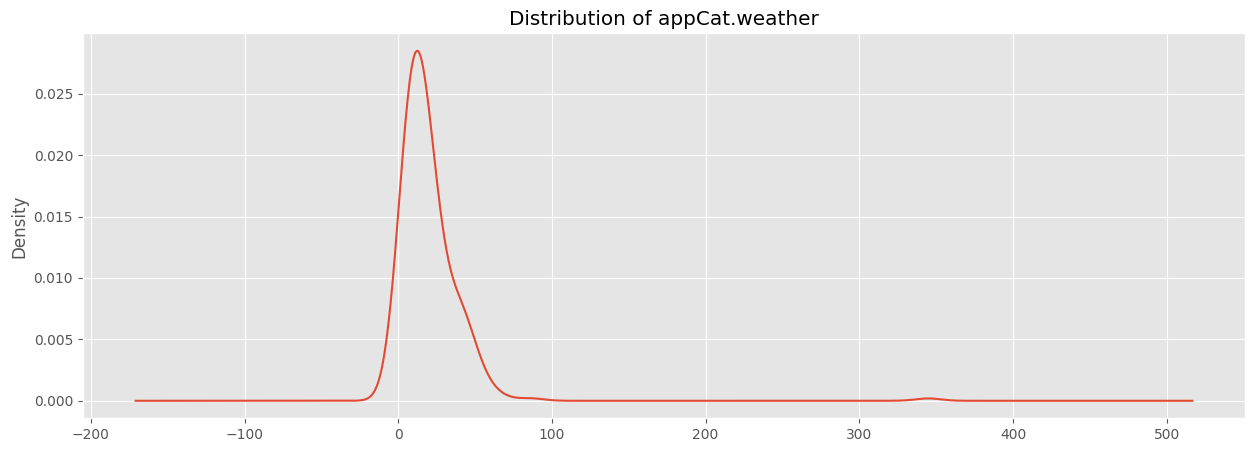

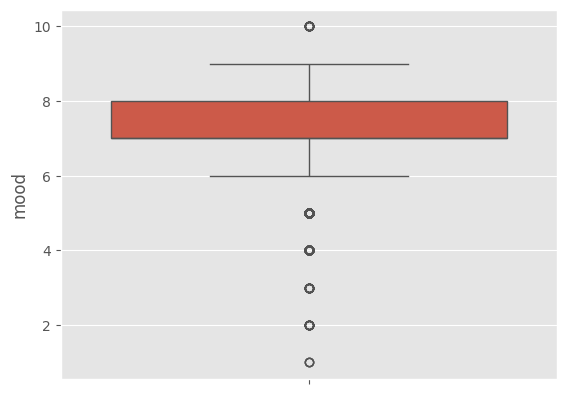

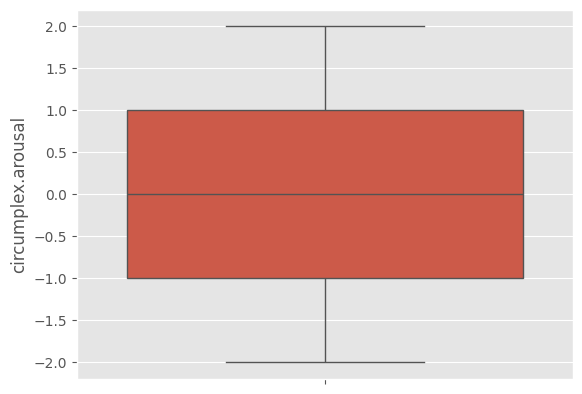

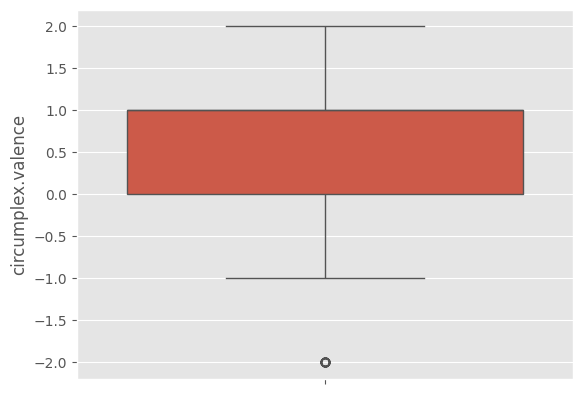

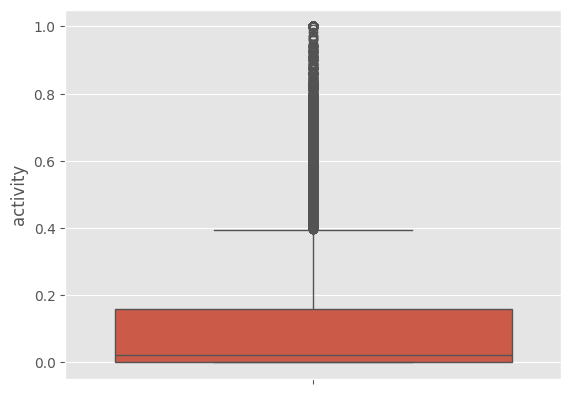

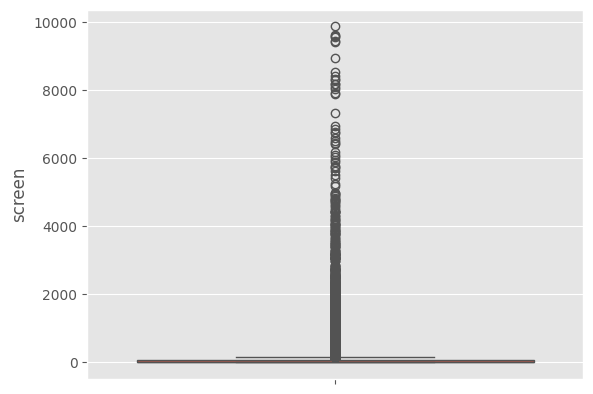

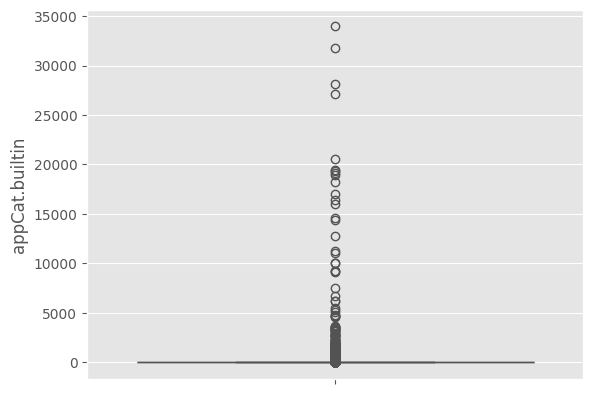

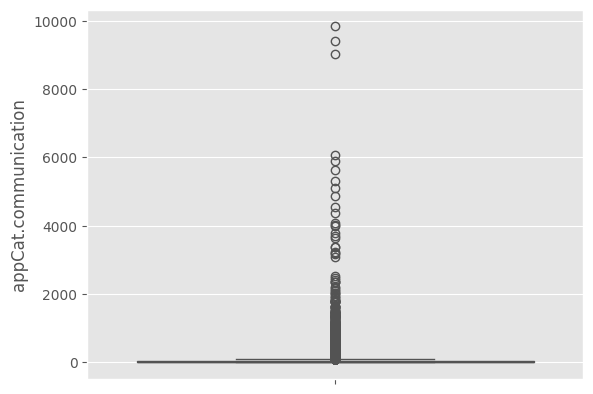

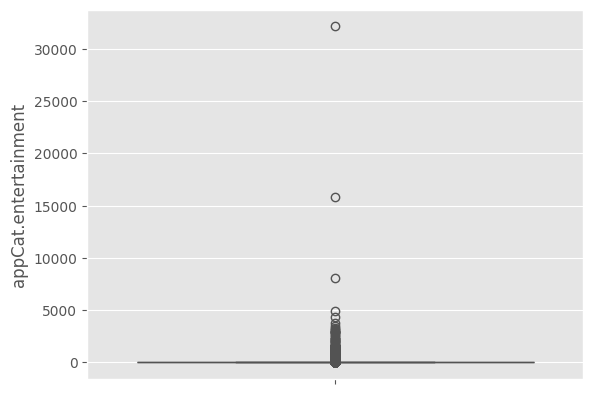

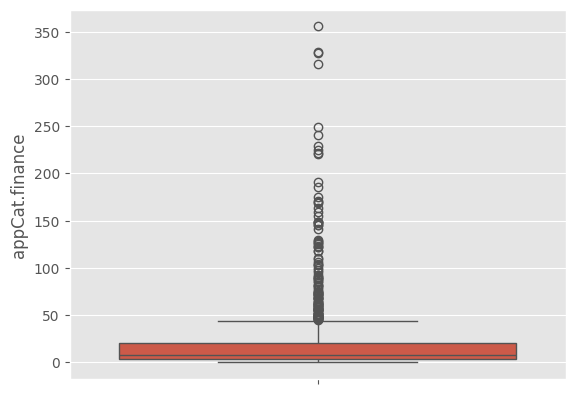

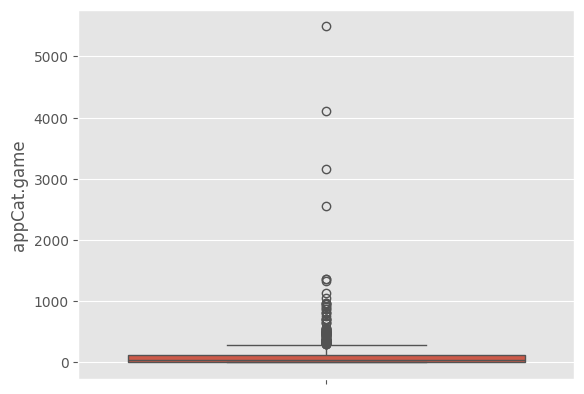

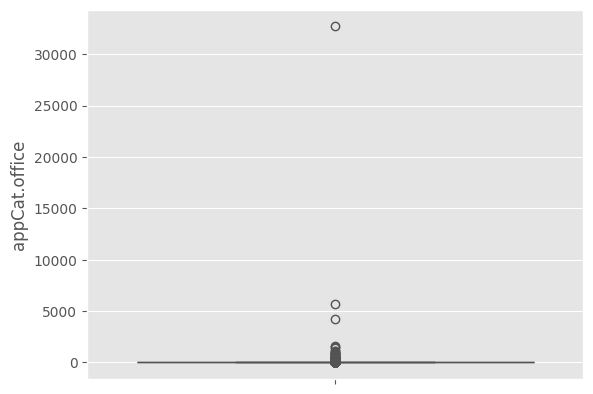

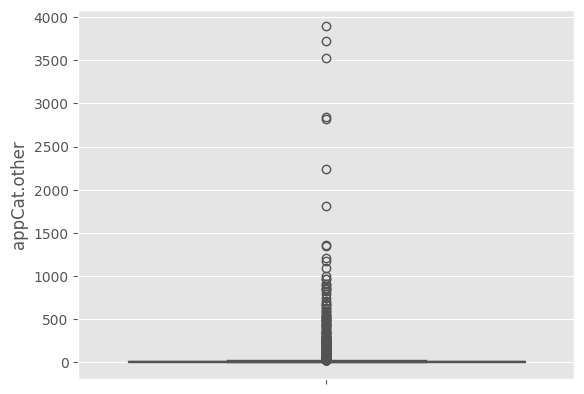

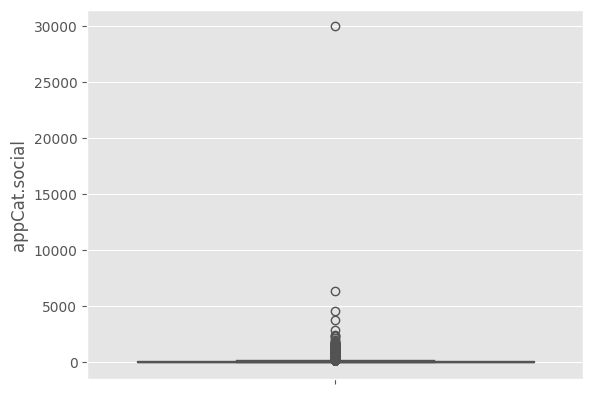

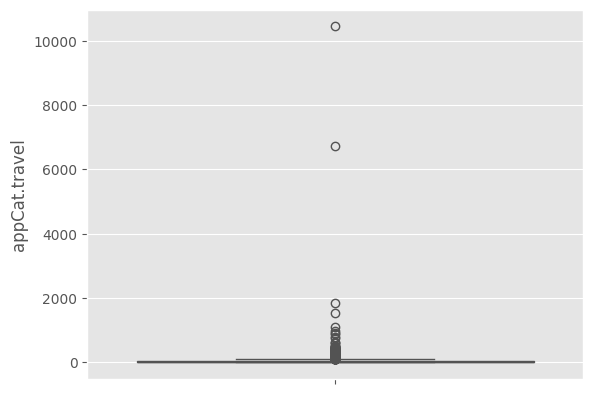

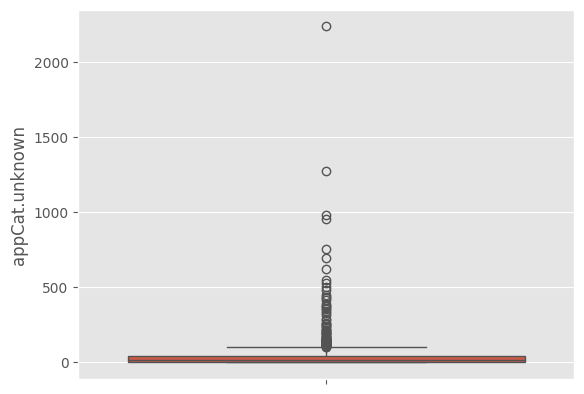

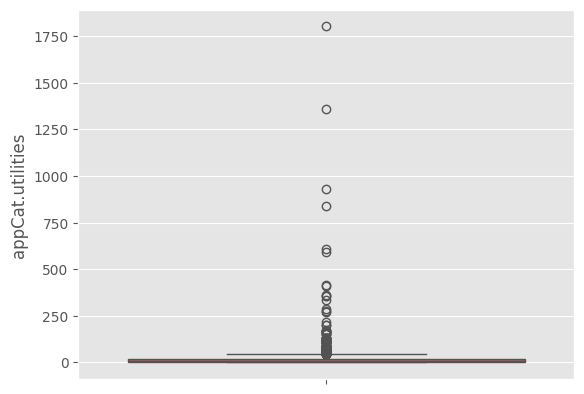

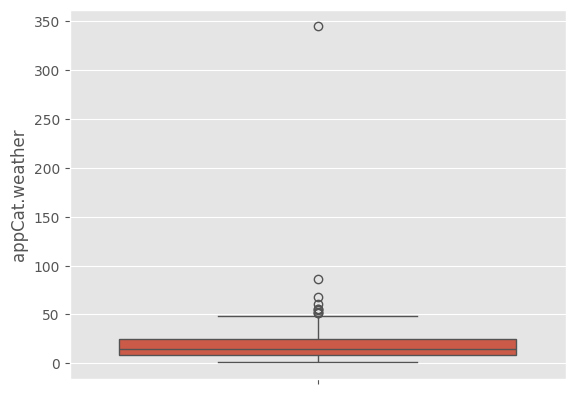

After looking at the boxplots 

In [162]:
aggregated_df = df.groupby(['id', df['datetime'].dt.date]).agg({'day_of_week': 'first',
                                                                'mood': 'mean', 
                                                                'circumplex.arousal': 'mean',
                                                                'circumplex.valence': 'mean', 
                                                                'activity': 'mean',
                                                                'screen': 'sum', 
                                                                'call': 'sum', 
                                                                'sms': 'sum',
                                                                'appCat.builtin': 'sum', 
                                                                'appCat.communication': 'sum',
                                                                'appCat.entertainment': 'sum', 
                                                                'appCat.finance':'sum', 
                                                                'appCat.game': 'sum', 
                                                                'appCat.office': 'sum', 
                                                                'appCat.other': 'sum', 
                                                                'appCat.social': 'sum', 
                                                                'appCat.travel': 'sum', 
                                                                'appCat.unknown': 'sum', 
                                                                'appCat.utilities': 'sum', 
                                                                'appCat.weather': 'sum'})

The following line of code is used to remove the rows with missing values in the mood column.

In [99]:
#aggregated_df = aggregated_df[aggregated_df['mood'].notna()]

In [163]:
aggregated_df['appCat_total'] = aggregated_df.filter(like='appCat').sum(axis=1)
column_order = ['day_of_week', 
                'mood', 
                'circumplex.arousal', 
                'circumplex.valence', 
                'activity', 
                'screen', 
                'call', 
                'sms', 
                'appCat_total', 
                'appCat.builtin', 
                'appCat.communication', 
                'appCat.entertainment', 
                'appCat.finance', 
                'appCat.game', 
                'appCat.office', 
                'appCat.other', 
                'appCat.social', 
                'appCat.travel', 
                'appCat.unknown', 
                'appCat.utilities', 
                'appCat.weather']


day_of_week      mood  circumplex.arousal  circumplex.valence  \
id datetime                                                                   
1  2014-02-26   Wednesday  6.250000               -0.25            0.750000   
   2014-02-27    Thursday  6.333333                0.00            0.333333   
   2014-03-21      Friday  6.200000                0.20            0.200000   
   2014-03-22    Saturday  6.400000                0.60            0.500000   
   2014-03-23      Sunday  6.800000                0.20            0.800000   

               activity        screen  call  sms  appCat_total  \
id datetime                                                      
1  2014-02-26       NaN      0.000000   1.0  2.0         0.000   
   2014-02-27       NaN      0.000000   0.0  0.0         0.000   
   2014-03-21  0.134050  17978.907000   6.0  0.0     16911.764   
   2014-03-22  0.236880   6142.161000   3.0  1.0      6501.448   
   2014-03-23  0.142741   6773.832001   0.0  0.0      7695.448   

               appCat.builtin  ...  appCat.entertainment  appCat.finance  \
id datetime                    ...                                         
1  2014-02-26           0.000  ...                 0.000           0.000   
   2014-02-27           0.000  ...                 0.000           0.000   
   2014-03-21        3139.218  ...              1007.456          49.544   
   2014-03-22         731.429  ...                93.324          21.076   
   2014-03-23        1286.246  ...                94.346          43.403   

               appCat.game  appCat.office  appCat.other  appCat.social  \
id datetime                                                              
1  2014-02-26          0.0          0.000         0.000          0.000   
   2014-02-27          0.0          0.000         0.000          0.000   
   2014-03-21          0.0        172.206       239.751       4508.500   
   2014-03-22          0.0          0.000        98.143        439.632   
   2014-03-23          0.0          0.000        72.823        900.839   

               appCat.travel  appCat.unknown  appCat.utilities  appCat.weather  
id datetime                                                                     
1  2014-02-26          0.000             0.0             0.000           0.000  
   2014-02-27          0.000             0.0             0.000           0.000  
   2014-03-21        915.445             0.0           598.754           0.000  
   2014-03-22         37.305             0.0           117.621           0.000  
   2014-03-23          0.000             0.0            30.086          30.386  

[5 rows x 21 columns]

(1973, 21)


In [167]:
merged_df = pd.read_csv('cleaned_data.csv')
#merged_df.drop(merged_df.columns[11:], axis=1, inplace=True)
print(merged_df.shape)
merged_df.head()

(1973, 23)


,id,datetime,day_of_week,mood,circumplex.arousal,circumplex.valence,activity,screen,call,sms,...,appCat.entertainment,appCat.finance,appCat.game,appCat.office,appCat.other,appCat.social,appCat.travel,appCat.unknown,appCat.utilities,appCat.weather
0,1,2014-02-17,Monday,NaN,NaN,NaN,NaN,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2014-02-18,Tuesday,NaN,NaN,NaN,NaN,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,2014-02-19,Wednesday,NaN,NaN,NaN,NaN,0.0,7.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,2014-02-20,Thursday,NaN,NaN,NaN,NaN,0.0,2.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,2014-02-21,Friday,NaN,NaN,NaN,NaN,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


 ### Task 1B: Data Cleaning (10 Points)

As the insights from Task 1A will have shown, the dataset you analyze contains quite somenoise. Values are sometimes missing, and extreme or incorrect values are seen that are likelyoutliers you may want to remove from the dataset. We will clean the dataset in two steps:
* Apply an approach to remove extreme and incorrect values from your dataset. Describewhat your approach is, why you 
consider that to be a good approach, and describe whatthe result of applying the approach is.
* Impute the missing 
values using two different approaches.  Describe the approachesand study the impact of applying them to your data.  Argue which one of the two ap-proaches would be most suitable and select that one to form your cleaned dataset. Alsobase yourself on scientific literature for making your choice.

**Advanced:** The advanced dataset contains a number of time series, select two approaches toimpute missing values that 
are logical for such time series and argue for one of them basedon the insights you gain. Also consider what to do with prolonged periods of missing data ina time series

id                        0
datetime                  0
day_of_week               0
mood                    705
circumplex.arousal      705
circumplex.valence      707
activity                785
screen                    0
call                      0
sms                       0
appCat_total              0
appCat.builtin            0
appCat.communication      0
appCat.entertainment      0
appCat.finance            0
appCat.game               0
appCat.office             0
appCat.other              0
appCat.social             0
appCat.travel             0
appCat.unknown            0
appCat.utilities          0
appCat.weather            0
dtype: int64

id                        int64
datetime                 object
day_of_week              object
mood                    float64
circumplex.arousal      float64
circumplex.valence      float64
activity                float64
screen                  float64
call                    float64
sms                     float64
appCat_total            float64
appCat.builtin          float64
appCat.communication    float64
appCat.entertainment    float64
appCat.finance          float64
appCat.game             float64
appCat.office           float64
appCat.other            float64
appCat.social           float64
appCat.travel           float64
appCat.unknown          float64
appCat.utilities        float64
appCat.weather          float64
dtype: object

In [172]:
from sklearn.impute import KNNImputer
from sklearn.metrics import mean_squared_error
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

rmse = lambda y, yhat: np.sqrt(mean_squared_error(y, yhat))
merged_df_before_drop = merged_df.copy()
merged_df = merged_df.drop('datetime', axis=1)
merged_df = merged_df.drop('day_of_week', axis=1)

In [173]:
def impute_and_update_by_id(df, id_col, target_col, max_iter):
    # Copy the DataFrame to avoid altering the original data outside the function
    updated_df = df.copy()
    
    # Loop through each unique ID in the dataset
    for group_id, group_data in updated_df.groupby(id_col):
        # Check if there are any NaNs in the target column for the current group
        if group_data[target_col].isna().any():
            # Initialize the imputer with max_iter and random_state
            imputer = IterativeImputer(max_iter=max_iter, random_state=0)
            
            # Apply imputation within this specific group
            columns = group_data.columns
            imputed_data = imputer.fit_transform(group_data)
            imputed_df = pd.DataFrame(imputed_data, index=group_data.index, columns=columns)
            
            # Update the original DataFrame with imputed values in the target column
            updated_df.loc[group_data.index, target_col] = imputed_df[target_col]
    
    return updated_df

In [174]:
#add a new column called imputed which can be 0 or 1
merged_df['imputed'] = 0

In [176]:
#for all rows, if there is a missing value in the row, set the imputed column to 1
merged_df.loc[merged_df.isnull().any(axis=1), 'imputed'] = 1

In [179]:
imputed_df_activity = impute_and_update_by_id(merged_df, 'id', 'activity', max_iter=10)
imputed_df_valence = impute_and_update_by_id(imputed_df_activity, 'id', 'circumplex.valence', max_iter=10)
imputed_df_arousal = impute_and_update_by_id(imputed_df_valence, 'id', 'circumplex.arousal', max_iter=10)
imputed_df = impute_and_update_by_id(imputed_df_arousal, 'id', 'mood', max_iter=10)


print(imputed_df.shape)

(1973, 22)


In [112]:
# When imputing based on the whole dataset
# KNN n_neighbors = 50: 0.008889323661190704
# MICE max_iter = 10:   0.008407281748369832

# When imputing based on the ID
# MICE max_iter = 10: 0.005388887953412595

# imputer = IterativeImputer(max_iter=10, random_state=0)
# imputed = imputer.fit_transform(merged)
# df_imputed = pd.DataFrame(imputed, columns=float_df.columns)

id                      0
mood                    0
circumplex.arousal      0
circumplex.valence      0
activity                0
screen                  0
call                    0
sms                     0
appCat_total            0
appCat.builtin          0
appCat.communication    0
appCat.entertainment    0
appCat.finance          0
appCat.game             0
appCat.office           0
appCat.other            0
appCat.social           0
appCat.travel           0
appCat.unknown          0
appCat.utilities        0
appCat.weather          0
imputed                 0
dtype: int64

In [114]:
# def optimize_k(data, target):
#     errors = []
#     for k in range(1, 25, 2):
#         imputer = KNNImputer(n_neighbors=k)
#         imputed = imputer.fit_transform(data)
#         df_imputed = pd.DataFrame(imputed, columns=float_df.columns)
#         
#         X = df_imputed.drop(target, axis=1)
#         y = df_imputed[target]
#         X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# 
#         model = RandomForestRegressor()
#         model.fit(X_train, y_train)
#         preds = model.predict(X_test)
#         error = rmse(y_test, preds)
#         errors.append({'K': k, 'MSE': error*error})
#         
#     return errors

In [115]:
# k_errors = optimize_k(data=float_df, target='activity')
# k_errors

In [116]:
# k_errors_df = pd.DataFrame(k_errors)
# k_errors_df

In [117]:
# import matplotlib.pyplot as plt
# plt.plot(k_errors_df['K'],k_errors_df['MSE'])
# plt.show()

,id,datetime,day_of_week,mood,circumplex.arousal,circumplex.valence,activity,screen,call,sms,...,appCat.finance,appCat.game,appCat.office,appCat.other,appCat.social,appCat.travel,appCat.unknown,appCat.utilities,appCat.weather,imputed
0,1,2014-02-17,Monday,7.252413,-0.274541,0.829811,0.089095,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,1,2014-02-18,Tuesday,7.252415,-0.274548,0.829819,0.089103,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,1,2014-02-19,Wednesday,7.252411,-0.274497,0.829784,0.089142,0.0,7.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,1,2014-02-20,Thursday,7.252426,-0.274533,0.829831,0.089220,0.0,2.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,1,2014-02-21,Friday,7.252422,-0.274554,0.829834,0.089152,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


(1973, 24)


id                      0
datetime                0
day_of_week             0
mood                    0
circumplex.arousal      0
circumplex.valence      0
activity                0
screen                  0
call                    0
sms                     0
appCat_total            0
appCat.builtin          0
appCat.communication    0
appCat.entertainment    0
appCat.finance          0
appCat.game             0
appCat.office           0
appCat.other            0
appCat.social           0
appCat.travel           0
appCat.unknown          0
appCat.utilities        0
appCat.weather          0
imputed                 0
dtype: int64

,id,datetime,day_of_week,mood,circumplex.arousal,circumplex.valence,activity,screen,call,sms,...,appCat.finance,appCat.game,appCat.office,appCat.other,appCat.social,appCat.travel,appCat.unknown,appCat.utilities,appCat.weather,imputed
0,1,2014-02-17,Monday,7.252413,-0.274541,0.829811,0.089095,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,1,2014-02-18,Tuesday,7.252415,-0.274548,0.829819,0.089103,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,1,2014-02-19,Wednesday,7.252411,-0.274497,0.829784,0.089142,0.0,7.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,1,2014-02-20,Thursday,7.252426,-0.274533,0.829831,0.089220,0.0,2.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,1,2014-02-21,Friday,7.252422,-0.274554,0.829834,0.089152,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


The following code just makes sure that the data is saved in the correct format and without Unnamed columns.

The following code is used to change the day_of_week column to numerical values.

datetime                datetime64[ns]
day_of_week                    float64
mood                           float64
circumplex.arousal             float64
circumplex.valence             float64
activity                       float64
screen                         float64
call                           float64
sms                            float64
appCat_total                   float64
appCat.builtin                 float64
appCat.communication           float64
appCat.entertainment           float64
appCat.finance                 float64
appCat.game                    float64
appCat.office                  float64
appCat.other                   float64
appCat.social                  float64
appCat.travel                  float64
appCat.unknown                 float64
appCat.utilities               float64
appCat.weather                 float64
imputed                          int64
dtype: object

,datetime,day_of_week,mood,circumplex.arousal,circumplex.valence,activity,screen,call,sms,appCat_total,...,appCat.finance,appCat.game,appCat.office,appCat.other,appCat.social,appCat.travel,appCat.unknown,appCat.utilities,appCat.weather,imputed
id,,,,,,,,,,,,,,,,,,,,,
1,2014-02-17,1.0,7.252413,-0.274541,0.829811,0.089095,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,2014-02-18,2.0,7.252415,-0.274548,0.829819,0.089103,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,2014-02-19,3.0,7.252411,-0.274497,0.829784,0.089142,0.0,7.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,2014-02-20,4.0,7.252426,-0.274533,0.829831,0.089220,0.0,2.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,2014-02-21,5.0,7.252422,-0.274554,0.829834,0.089152,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


,datetime,day_of_week,mood,circumplex.arousal,circumplex.valence,activity,screen,call,sms,appCat_total,...,appCat.game,appCat.office,appCat.other,appCat.social,appCat.travel,appCat.unknown,appCat.utilities,appCat.weather,imputed,mood_of_next_day
id,,,,,,,,,,,,,,,,,,,,,
1,2014-02-17,1.0,7.252413,-0.274541,0.829811,0.089095,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,7.252415
1,2014-02-18,2.0,7.252415,-0.274548,0.829819,0.089103,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,7.252411
1,2014-02-19,3.0,7.252411,-0.274497,0.829784,0.089142,0.0,7.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,7.252426
1,2014-02-20,4.0,7.252426,-0.274533,0.829831,0.089220,0.0,2.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,7.252422
1,2014-02-21,5.0,7.252422,-0.274554,0.829834,0.089152,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,7.252417


datetime                0
day_of_week             0
mood                    0
circumplex.arousal      0
circumplex.valence      0
activity                0
screen                  0
call                    0
sms                     0
appCat_total            0
appCat.builtin          0
appCat.communication    0
appCat.entertainment    0
appCat.finance          0
appCat.game             0
appCat.office           0
appCat.other            0
appCat.social           0
appCat.travel           0
appCat.unknown          0
appCat.utilities        0
appCat.weather          0
imputed                 0
mood_of_next_day        0
dtype: int64

datetime                 object
day_of_week             float64
mood                    float64
circumplex.arousal      float64
circumplex.valence      float64
activity                float64
screen                  float64
call                    float64
sms                     float64
appCat_total            float64
appCat.builtin          float64
appCat.communication    float64
appCat.entertainment    float64
appCat.finance          float64
appCat.game             float64
appCat.office           float64
appCat.other            float64
appCat.social           float64
appCat.travel           float64
appCat.unknown          float64
appCat.utilities        float64
appCat.weather          float64
imputed                   int64
mood_of_next_day        float64
dtype: object

### Task 1C: Feature Engineering (10 Points)

While we now have a clean dataset, we can still take one step before we move to classificationor regression that can 
in the end help to improve performance, namely feature engineering. As discussed during the lectures, feature 
engineering is a creative process and can involve for example the transformation of values (e.g.  take the log of values given a certain distri-bution of values) or combining multiple features (e.g.  two features that are more valuablecombined than the two separate values).  Think of a creative feature engineering approachfor your dataset, describe it, and apply it. Report on why you think this is a useful enrichmentof your dataset.

**Advanced:** Essentially there are two approaches you can consider to create a predictive modelusing this dataset 
(which we will do in the next part of this assignment):  (1) use a machinelearning approach that can deal with temporal data (e.g.  recurrent neural networks) or youcan try to aggregate the history somehow to create attributes that can be used in a more com-mon machine learning approach (e.g. SVM, decision tree). For instance, you use the averagemood during the last five days as a predictor.  Ample literature is present in the area of tem-poral data mining that describes how such a transformation can be made.  For the featureengineering, you are going to focus on such a transformation in this part of the assignment.This is illustrated in Figure 1

![alt text](figure_1.png "Figure 1")

In  the  end,  we  end  up  with  a  dataset  with  a  number  of  training  instances  per  patient  (asyou have a 
number of time points for which you can train), i.e.  an instance that concernsthe mood at t=1, t=2, etc.  Of course 
it depends on your choice of the history you considerrelevant  from  what  time  point  you  can  start  predicting  (if  you  use  a  windows  of  5  days  ofhistory to create attributes you cannot create training instances before the 6th day). To come to this dataset, you need to:
1.  Define attributes that aggregate the history, draw inspiration from the scientific litera-ture.
2.  Define the target by averaging the mood over the entire day.
3.  Create an instance-based dataset as described in Figure 1